<a href="https://colab.research.google.com/github/ShrikantUppin/Ensemble_techniques/blob/main/A_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Importing Libraries..

In [1]:
import numpy as np
import pandas as pd

import imblearn

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 2: Pre-processed Dataset Loading..

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/encoding_df.csv')

#### 2.1 checking first five rows from dataset...
***

In [4]:
dataset.head()

,Hospital_Id,Age,Gender,Cultural_group,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Emergency_dept_yes_No,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,37,2,0,3,4,0,7,122,0,1,1,1,1.01,1,1
1,37,4,0,3,4,5,17,197,0,3,2,1,1.08,1,1
2,37,2,0,3,3,5,7,122,0,1,1,1,1.06,1,1
3,37,0,0,3,1,5,7,122,0,1,1,1,1.48,0,1
4,37,4,0,3,3,0,7,122,0,2,3,1,0.99,1,1


#### 2.2 Value Counts of Result column (Depedent variable)
***

1    784555
0    261495
Name: Result, dtype: int64



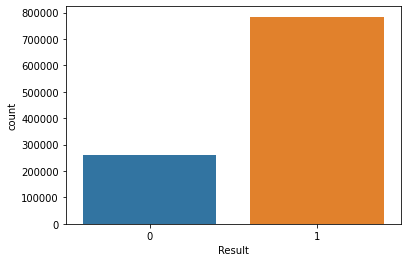

In [5]:
print(dataset.Result.value_counts())
print()

sns.countplot(dataset.Result)
plt.show()

* Data labels shows, data is in imbalance state.
* To solve the bias outputs, i am using model ensemble method approch.
* Splitting the dataset into '0' label & '1' label. And making new bootstrapped datasets from it.
* Applying diffrent algorithm on each model & trying diffrent approches to finalize the results.

#### 2.3 Seperate '0' & '1' labeled rows...
***

In [6]:
# forming a new dataset..

result_0 = dataset.loc[dataset['Result']==0]
result_1 = dataset.loc[dataset['Result']==1]

In [7]:
# Cheking shape of the data..

print('result_0.shpae',result_0.shape)
print('result_1.shpae',result_1.shape)

result_0.shpae (261495, 15)
result_1.shpae (784555, 15)


In [8]:
# Checking out % rows in result_0 & result_1 dataset.

(result_1.shape[0])/(result_0.shape[0])

3.0002676915428594

* It is clear that lable '1' is having three times more count than label '0'.
* So the next approach is to split the result_1 dataset into three halves.
* Also the 'ratio_to_cost_to_charge' column can be sort and split according to variance based. And generate models for particular range of ratio values. So that data will be balanced and we can use multiple models.

In [9]:
# Checking variance of ratio column in result_0

result_0.ratio_of_total_costs_to_total_charges.var()

0.5744610854265639

In [10]:
result_0.ratio_of_total_costs_to_total_charges.min()

0.05

In [11]:
result_0.ratio_of_total_costs_to_total_charges.max()

143.14

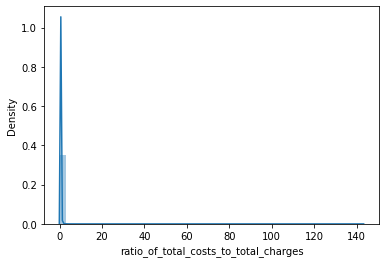

In [12]:
sns.distplot(result_0['ratio_of_total_costs_to_total_charges'])
plt.show()

In [13]:
result_0['ratio_of_total_costs_to_total_charges'].quantile(0.95)

0.83

In [14]:
# checking out row counts when ratio counts is above upper quantile i.e. 0.83

result_0.loc[result_0['ratio_of_total_costs_to_total_charges']>0.83].shape[0]

10676

In [15]:
# so rows number for first dataset is..

result_0.shape[0]-10676

250819

In [16]:
# checking out row counts when ratio counts is above upper quantile i.e. 0.83

result_1.loc[result_1['ratio_of_total_costs_to_total_charges']>0.83].shape

(31728, 15)

In [17]:
result_1.shape[0]-31728

752827

# Step 3: Analysis for ratio of cost to charge <= 0.83
***

In [69]:
data_0 = result_0.loc[result_0['ratio_of_total_costs_to_total_charges']<0.84]
data_1 = result_1.loc[result_1['ratio_of_total_costs_to_total_charges']<0.84]

data_2 = result_0.loc[result_0['ratio_of_total_costs_to_total_charges']>0.83]
data_3 = result_1.loc[result_1['ratio_of_total_costs_to_total_charges']>0.83]

In [70]:
data_2.shape

(10676, 15)

In [71]:
data_3.shape

(31728, 15)

In [72]:
(data_3.shape[0])/(data_2.shape[0])

2.971899587860622

* So we can split data_1 into three sets & build a model.
* Also we can use smote tech on this dataset.

### 3.1 Using Smote
***

In [20]:
# Concating two dataset..

trial_1 = pd.concat([data_0, data_1])

### Pycaret 

* It is fast as compared to mannual sklearn method.
* Also gives faster results
* So i am using pycaret.

#### Dataset splitting for testing purpose...

In [21]:
data = trial_1.sample(frac=0.95, random_state=786)
data_unseen = trial_1.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (953464, 15)
Unseen Data For Predictions: (50182, 15)


#### 3.1.2 Using Smote with Pycaret

In [22]:
from pycaret.classification import *

In [23]:
# creating numeric feature column list
numeric_features_list = trial_1.drop(['Result'],axis=1).columns.to_list()

In [26]:
model_1 = setup(data = trial_1,
                target = 'Result',
                numeric_features = numeric_features_list,
                fix_imbalance = True,
                session_id=123)

,Description,Value
0,session_id,123
1,Target,Result
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1003646, 15)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
xgboost = create_model('xgboost', fold=3)

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:19:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


KeyboardInterrupt: ignored

In [ ]:
plot_model(xgboost, plot='class_report')

* SMOTE showing poor performance. 
* So will try for model ensemble method

#### 3.2.2 Dataset Split+ Model Ensemble method


In [27]:
# Sorting data_1 by ratio column & spliting it into three datasets & build three model.

data_1.sort_values(by='ratio_of_total_costs_to_total_charges', inplace=True, ignore_index=True)

In [28]:
data_1.shape

(752827, 15)

In [79]:
split_1 = pd.concat([data_0, data_1.iloc[0:250943,0:]])
split_2 = pd.concat([data_0, data_1.iloc[250943:501885,0:]])
split_3 = pd.concat([data_0, data_1.iloc[501885:752828,0:]])


split_4 = pd.concat([data_2, data_3.iloc[0:10577,0:]])
split_5 = pd.concat([data_2, data_3.iloc[10577:21153,0:]])
split_6 = pd.concat([data_2, data_3.iloc[21153:31729,0:]])

In [78]:
data_3.shape

(31728, 15)

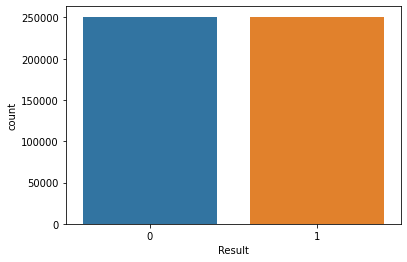

In [30]:
sns.countplot(split_1.Result)
plt.show()

#### applying on split_1 dataset

In [102]:

split_data_6 = split_6.sample(frac=0.95, random_state=786)
data_unseen = split_6.drop(split_data_6.index)
split_data_6.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(split_data_6.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (20188, 15)
Unseen Data For Predictions: (1063, 15)


In [103]:
from pycaret.classification import *

model_1 = setup(data = split_data_6,
                target = 'Result',
                numeric_features = numeric_features_list,
                fix_imbalance = False,
                session_id=123)

,Description,Value
0,session_id,123
1,Target,Result
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(20188, 15)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [104]:
compare_model1 = compare_models(exclude=['rf'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8303,0.8355,0.9896,0.7515,0.8542,0.6601,0.6965,0.834
lightgbm,Light Gradient Boosting Machine,0.8281,0.8343,0.9834,0.7513,0.8518,0.6557,0.6899,0.192
catboost,CatBoost Classifier,0.8270,0.8333,0.9780,0.7521,0.8503,0.6534,0.6855,6.862
xgboost,Extreme Gradient Boosting,0.8193,0.8341,0.9559,0.7519,0.8417,0.6382,0.6634,2.546
ada,Ada Boost Classifier,0.7994,0.8296,0.9270,0.7397,0.8228,0.5983,0.6188,0.328
knn,K Neighbors Classifier,0.7908,0.8296,0.8859,0.7456,0.8097,0.5812,0.5920,0.240
et,Extra Trees Classifier,0.7587,0.8072,0.7924,0.7439,0.7674,0.5172,0.5184,1.098
dt,Decision Tree Classifier,0.7473,0.7597,0.7433,0.7511,0.7472,0.4946,0.4946,0.056
qda,Quadratic Discriminant Analysis,0.7405,0.7865,0.7812,0.7241,0.7515,0.4808,0.4824,0.032
nb,Naive Bayes,0.7234,0.7711,0.7763,0.7037,0.7382,0.4465,0.4490,0.032


In [105]:
split_1_lgbm = create_model('gbc', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8291,0.8385,0.9873,0.7509,0.8531,0.6578,0.6935
1,0.8351,0.8433,0.9873,0.7578,0.8575,0.6697,0.7032
2,0.8234,0.8262,0.9908,0.7433,0.8494,0.6463,0.6860
3,0.8365,0.8412,0.9930,0.7573,0.8592,0.6725,0.7082
4,0.8273,0.8283,0.9894,0.7480,0.8519,0.6542,0.6916
Mean,0.8303,0.8355,0.9896,0.7515,0.8542,0.6601,0.6965
SD,0.0049,0.0069,0.0022,0.0055,0.0036,0.0098,0.0081


In [106]:
split_1_lgbm

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

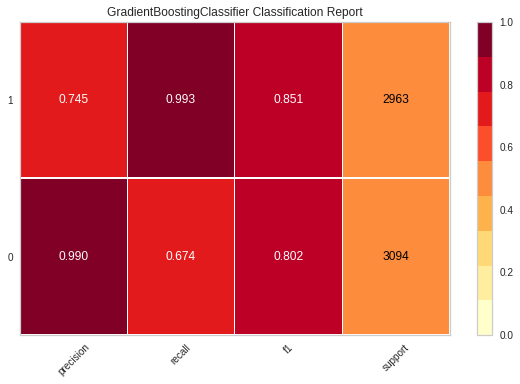

In [107]:
plot_model(split_1_lgbm, plot='class_report')

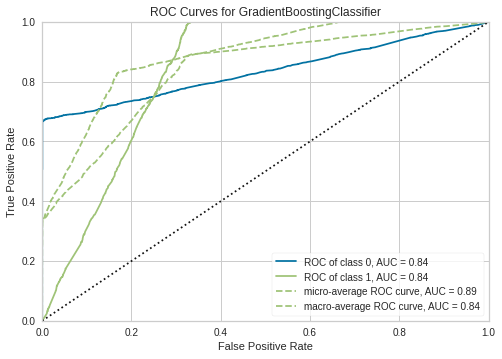

In [108]:
plot_model(split_1_lgbm, plot='auc')

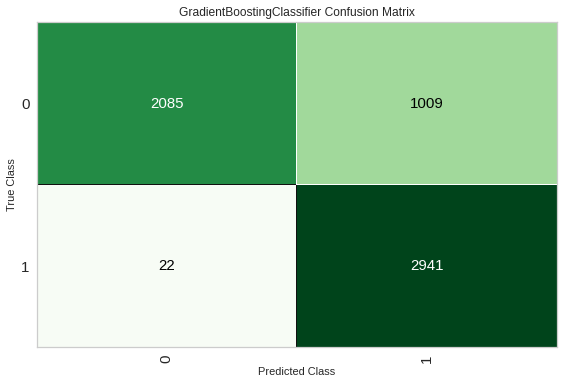

In [109]:
plot_model(split_1_lgbm, plot = 'confusion_matrix')

In [110]:
predict_model(split_1_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8298,0.8351,0.9926,0.7446,0.8509,0.6618,0.6995


,Hospital_Id,Age,Gender,Cultural_group,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality_risk,Emergency_dept_yes_No,ratio_of_total_costs_to_total_charges,Payment_Typology,Result,Label,Score
0,848.0,0.0,0.0,3.0,1.0,2.0,7.0,218.0,220.0,1.0,1.0,0.0,1.04,2.0,1,1,0.7364
1,746.0,3.0,1.0,3.0,2.0,1.0,7.0,2.0,0.0,3.0,3.0,1.0,0.93,2.0,1,1,0.6215
2,1117.0,0.0,0.0,3.0,2.0,2.0,7.0,218.0,0.0,1.0,1.0,0.0,1.15,1.0,1,1,0.7832
3,1164.0,2.0,1.0,1.0,6.0,1.0,7.0,659.0,218.0,1.0,1.0,1.0,0.99,2.0,1,1,0.7305
4,98.0,3.0,1.0,3.0,32.0,1.0,17.0,122.0,216.0,3.0,2.0,1.0,1.50,1.0,0,0,0.9864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,1072.0,3.0,0.0,3.0,8.0,0.0,18.0,155.0,96.0,4.0,4.0,0.0,0.87,3.0,1,1,0.6813
6053,325.0,1.0,0.0,3.0,1.0,0.0,7.0,196.0,0.0,1.0,1.0,0.0,0.89,1.0,1,1,0.5908
6054,3067.0,2.0,0.0,3.0,2.0,0.0,7.0,195.0,137.0,2.0,1.0,0.0,0.90,2.0,0,0,0.9764
6055,1117.0,0.0,0.0,3.0,3.0,1.0,7.0,122.0,0.0,1.0,1.0,1.0,1.89,1.0,1,1,0.7233


In [111]:
unseen_predictions = predict_model(split_1_lgbm, data=data_unseen)

from pycaret.utils import check_metric
check_metric(unseen_predictions['Result'], unseen_predictions['Label'], metric = 'AUC')

0.8362

### split_1 = lightgbm 0.83 / 0.79 /0.85
### split_2 = lightgbm 0.83 / 0.83 /0.85 slight overfitting issue
### Split_3 = lightgbm 0.83 / 0.81 /0.85
### Split_4 = gbc 0.82 /0.80 /0.85
### Split_5 = gbc 0.82 /0.83 /0.84
### Split_6 = gbc 0.83 /0.83 /0.84